# Importing the Dependencies

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Collection and Processing

In [180]:
# loading the data from csv file to pandas dataframe
car_dataset = pd.read_csv('dataset.csv')

In [181]:
# inspecting the first 5 rows of the dataframe
car_dataset.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [182]:
# checking the number of rows and columns
car_dataset.shape

(1002, 17)

In [183]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [184]:
# checking the number of missing values
car_dataset.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [185]:
# checking the distribution of categorical data
print(df['fuel'].value_counts())
print(df['make'].value_counts())
print(df['model'].value_counts())
print(df['transmission'].value_counts())
print(df['body'].value_counts()) 

fuel
0                   541
Hybrid              120
1                    69
PHEV Hybrid Fuel     16
E85 Flex Fuel         3
2                     1
Name: count, dtype: int64
make
12    164
6     105
10     77
20     76
7      57
4      44
19     40
17     37
23     34
13     21
18     14
8      12
9      12
0       9
1       8
5       8
22      7
2       6
11      4
14      4
21      3
24      3
3       3
15      1
16      1
Name: count, dtype: int64
model
49    55
2     49
21    41
26    39
19    34
      ..
14     1
89     1
1      1
6      1
57     1
Name: count, Length: 118, dtype: int64
transmission
8-Speed Automatic                              265
1                                              176
6-Speed Automatic                               83
9-Speed Automatic                               53
10-Speed Automatic                              40
Automatic CVT                                   35
8-Speed Automatic with Auto-Shift               16
8-Speed Automatic with Tiptron

In [186]:
# To see all column names
print(df.columns)

Index(['name', 'description', 'make', 'model', 'year', 'price', 'engine',
       'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors',
       'exterior_color', 'interior_color', 'drivetrain'],
      dtype='object')


# Encoding the Categorical Data

In [187]:
# Encoding "fuel" column
df.replace({'fuel': {'Gasoline': 0, 'Diesel': 1, 'Electric': 2}}, inplace=True)

# Encoding "transmission" column
df.replace({'transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

# Encoding "body" column
df.replace({'body': {'Sedan': 0, 'SUV': 1, 'Hatchback': 2, 'Coupe': 3}}, inplace=True)

# Encoding "drivetrain" column
df.replace({'drivetrain': {'FWD': 0, 'RWD': 1, 'AWD': 2}}, inplace=True)

# Encoding "make" column (assuming 'Toyota', 'Ford', etc. are the brands)
df['make'] = df['make'].astype('category').cat.codes

# Encoding "model" column (assuming 'Camry', 'Corolla' etc. are the models)
df['model'] = df['model'].astype('category').cat.codes

In [188]:
car_dataset.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


# Splitting the data and Target

In [189]:
# Defining features (X) and target (Y)
X = df.drop(['model', 'price'], axis=1)  # Drop 'model' and 'price' columns from features
Y = df['price']  # Target is the 'price' column

In [190]:
print(X)

                                                name  \
0                       2024 Jeep Wagoneer Series II   
1                    2024 Jeep Grand Cherokee Laredo   
3                         2023 Dodge Durango Pursuit   
4                              2024 RAM 3500 Laramie   
5                        2024 Nissan Murano Platinum   
...                                              ...   
997   2024 Mercedes-Benz Sprinter 2500 Standard Roof   
998           2024 Dodge Hornet Hornet R/T Plus Eawd   
999                          2024 Jeep Wagoneer Base   
1000           2024 Nissan Murano SV Intelligent AWD   
1001                2024 Chevrolet Silverado 2500 WT   

                                            description  make  year  \
0     \n      \n        Heated Leather Seats, Nav Sy...    12  2024   
1     Al West is committed to offering every custome...    12  2024   
3     White Knuckle Clearcoat 2023 Dodge Durango Pur...     6  2023   
4     \n      \n        2024 Ram 3500 Laram

In [191]:
print(Y)

0       74600.0
1       50170.0
3       46835.0
4       81663.0
5       46000.0
         ...   
997     59037.0
998     49720.0
999     69085.0
1000    43495.0
1001    48995.0
Name: price, Length: 750, dtype: float64


In [192]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['model'] = label_encoder.fit_transform(df['model'])  # Encode the 'model' column

In [193]:
X = pd.get_dummies(df.drop(['price'], axis=1), drop_first=True)  # One-hot encode all categorical variables

In [194]:
print(X.dtypes)  # Ensure all columns are numeric

make                                           int8
model                                         int64
year                                          int64
cylinders                                   float64
mileage                                     float64
                                             ...   
interior_color_Wicker Beige/Global Black       bool
interior_color_gray                            bool
drivetrain_Four-wheel Drive                    bool
drivetrain_Front-wheel Drive                   bool
drivetrain_Rear-wheel Drive                    bool
Length: 1455, dtype: object


# Splitting Training and Test data

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

# Model Training

# (1) Linear Regression

In [196]:
# Model training, Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

# Model Evaluation

In [197]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [198]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9996727792524435


# Visualize the actual prices and Predicted prices

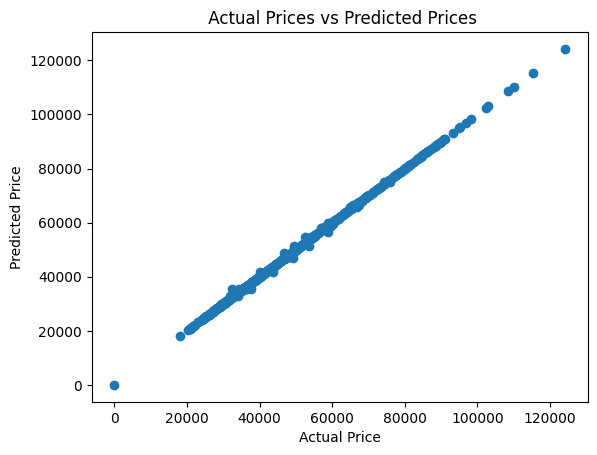

In [199]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [200]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [201]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.4133731374395606


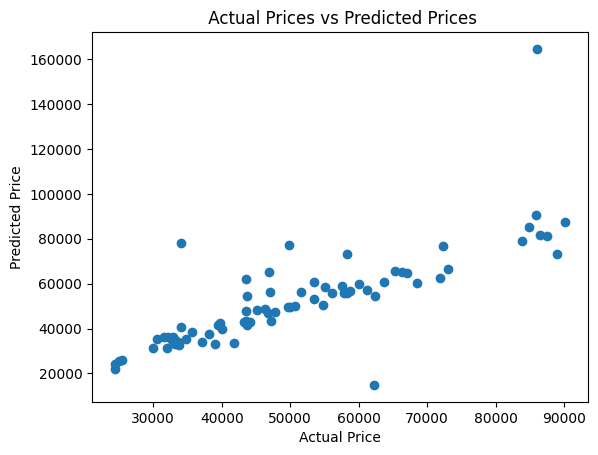

In [202]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# (2) Lasso Regression

In [213]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

# First, let's scale our features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Now create and fit the Lasso model with better parameters
lass_reg_model = Lasso(
    alpha=1.0,          # Regularization strength - adjust this based on your needs
    max_iter=10000,     # Increased iterations to give more time to converge
    tol=1e-4,          # Slightly relaxed tolerance
    random_state=42     # For reproducibility
)

# Fit the model with scaled features
lass_reg_model.fit(X_train_scaled, Y_train)

Lasso(max_iter=10000, random_state=42)

In [212]:
# Check if the model converged
print(f"Model converged: {lass_reg_model.n_iter_ < lass_reg_model.max_iter}")
print(f"Number of iterations needed: {lass_reg_model.n_iter_}")

Model converged: True
Number of iterations needed: 4220


# Model Evaluation

In [205]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [206]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9986663007589263


# Visualize the actual prices and Predicted prices

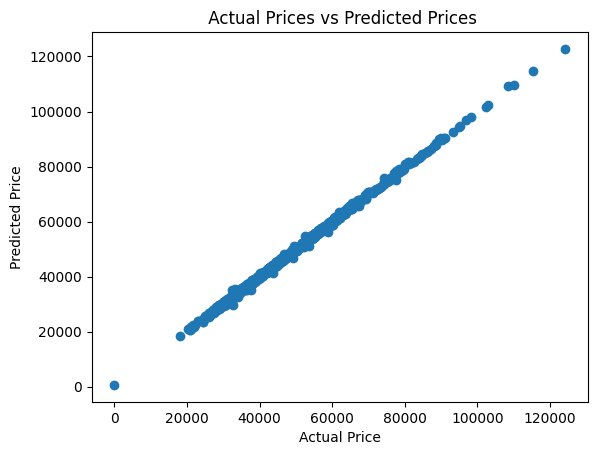

In [207]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [208]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [209]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7567746401529243


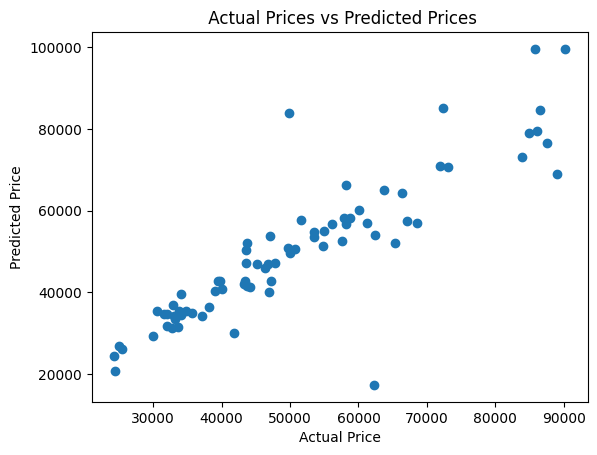

In [210]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()